In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_test.shape

(10000,)

<br> Plot a image at index 0

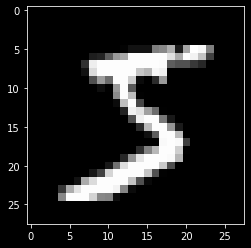

In [7]:
# plt.figure(figsize=(1,1))
plt.style.use(['dark_background'])

plt.imshow(X_train[0])
plt.gray()

In [8]:
y_train[0]

5

So, the image at index no. 0 is 5

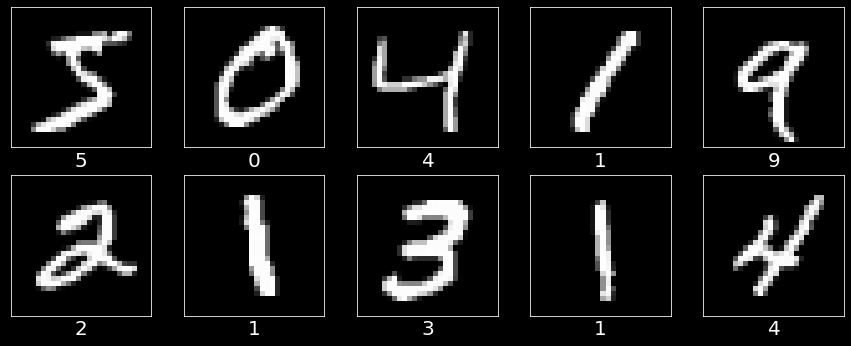

In [9]:
plt.figure(figsize=(15,15))

for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    # plt.axis('off')
    plt.xlabel(y_train[i], color='#fff', fontsize=20)

<br> Preprocessing data

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## <br> Test, train split

In [11]:
# lets, scale the image in a range of 0-1

X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## <br> Build the model

In [85]:
model = keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

In [86]:
model.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
)

In [87]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1207 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9842


In [88]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0772 - accuracy: 0.9773


[0.07720847427845001, 0.9772999882698059]

## <br> Model predict

In [89]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.6061147e-04, 2.1668471e-04, 6.5814990e-01, 9.4972998e-01,
       7.5613521e-08, 2.8293060e-02, 2.5986994e-08, 9.9996644e-01,
       4.3641746e-02, 3.4392133e-02], dtype=float32)

In [90]:
# predicted value of index 0 in X_test
np.argmax(y_predicted[0])       ##   using np.argmax we got the max value of the array of index[0] out of 10 outcomes

7

In [91]:
# actual value
y_test[0]

7

In [92]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [94]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    5,    1,    0,    0,    2,    1,    5,    0],
       [   0, 1114,    5,    0,    0,    0,    2,    2,   12,    0],
       [   0,    0, 1019,    0,    3,    0,    1,    5,    4,    0],
       [   0,    0,    3,  991,    1,    4,    0,    5,    3,    3],
       [   0,    0,    4,    0,  966,    0,    2,    4,    1,    5],
       [   2,    0,    0,    9,    2,  864,    4,    2,    7,    2],
       [   8,    3,    3,    1,    8,    4,  927,    0,    4,    0],
       [   1,    2,   13,    2,    1,    0,    0, 1003,    1,    5],
       [   3,    0,    8,    2,    3,    3,    2,    3,  948,    2],
       [   3,    2,    0,    6,   14,    1,    0,    4,    4,  975]])>

Text(87.0, 0.5, 'Actual')

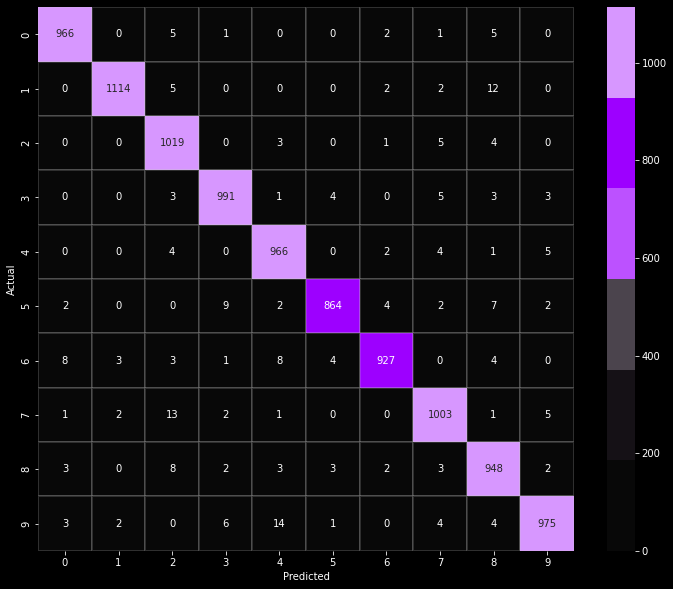

In [95]:
import seaborn as sns
plt.figure(figsize=(12,10))

colormap = sns.color_palette([ "#080808", "#151116", "#4b444d", "#bc51ff", "#9d00ff", "#d797ff"])
sns.heatmap(cm, cmap=colormap, annot=True, fmt='d', linewidths=0.1, linecolor="#cdcdcd33")
plt.xlabel("Predicted")
plt.ylabel("Actual")